# Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

Задание

Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график;
Рассчитать коэффициенты корреляции Пирсона и Спирмена;
Построить модель линейной регрессии;
Рассчитать коэффициент детерминации;
Вывести график остатков.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы;
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [3]:
# Удаляем столбец с индексами из датафрейма
df.drop(['Unnamed: 0'],axis = 1, inplace = True)
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


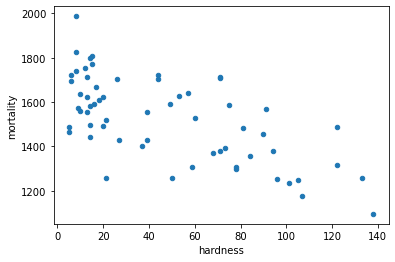

In [22]:
df.plot(kind='scatter', x='hardness', y='mortality')

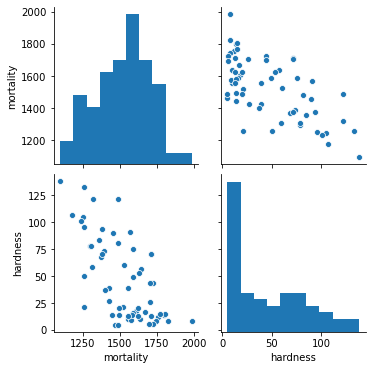

In [5]:
sns.pairplot(df)

In [6]:
# коэффициент корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [7]:
# коэффициент корреляции Спирмена
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


**Вывод:** Значения коэффициентов корреляции (Пирсона и Спирмена) принимают близкие значения в интервале от 0,63 до 0,65. По шкале Чедока связь между показателями заметная. Т.к. коэффициент отрицательный - то связь обратная. Таким образом, можно предположить, что чем выше жесткость воды, тем ниже годовая смертность 

In [8]:
X = df[['hardness']]
y = df['mortality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_train.shape

(42, 1)

In [11]:
y_train.shape

(42,)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [13]:
model.coef_

array([-3.13167087])

In [14]:
model.intercept_

1668.9722977277095

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [16]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

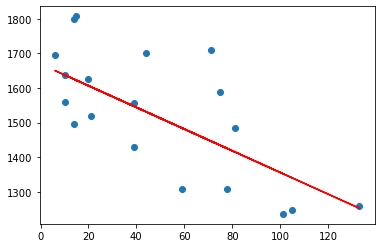

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

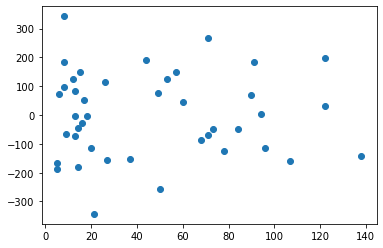

In [18]:
resid = y_train - model.predict(X_train)
plt.scatter(x=X_train, y=resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <a list of 10 Patch objects>)

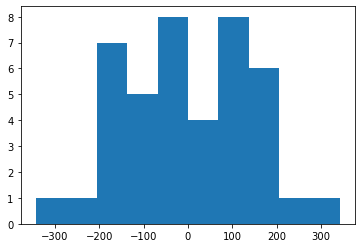

In [19]:
plt.hist(resid)

На графике остатков (scatter) видно, что они распределены случайным образом. И имеют нормальное распределение (график hist)

**Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
Разделить данные на 2 группы; Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности.**

**Северные города**

In [21]:
df_north = df[df.location == 'North']
df_north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


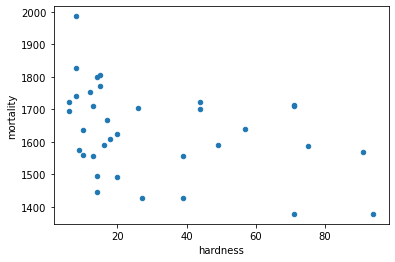

In [23]:
df_north.plot(kind='scatter', x ='hardness', y='mortality')

In [24]:
df_north[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [26]:
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [27]:
X1 = df_north[['hardness']]
y1 = df_north['mortality']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [28]:
y1_pred = model.predict(X1_test)
y1_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [30]:
model.score(X1_test, y1_test)

0.018885304285745863

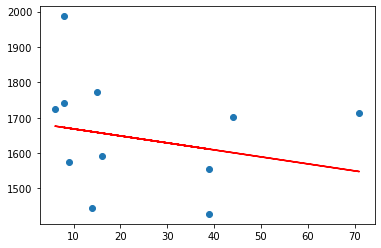

In [31]:
plt.scatter(X1_test, y1_test)
plt.plot(X1_test, y1_pred, c='r')

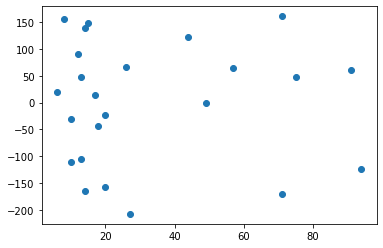

In [32]:
resid1 = y1_train - model.predict(X1_train)
plt.scatter(x=X1_train, y=resid1)

**Южные города**

In [33]:
df_south = df[df.location == 'South']
df_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


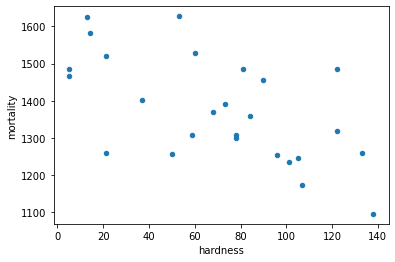

In [34]:
df_south.plot(kind='scatter',x='hardness',y='mortality')

In [35]:
df_south[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [37]:
df_south[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [44]:
X2=df_south[['hardness']]
y2=df_south['mortality']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=294)
model = LinearRegression()
model.fit(X2_train, y2_train)

LinearRegression()

In [45]:
y2_pred = model.predict(X2_test)
y2_pred

array([1380.11706801, 1480.24477471, 1259.59297661, 1370.84598406,
       1311.51104676, 1467.26525718, 1361.57490011, 1437.59778853])

In [46]:
model.score(X2_test, y2_test)

0.7708733470874118

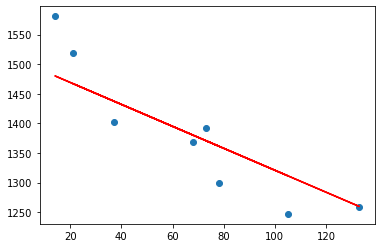

In [47]:
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, y2_pred, c='r')

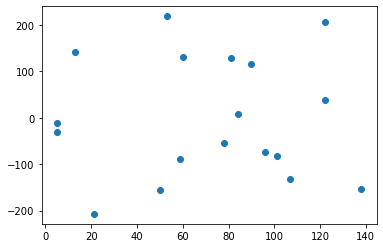

In [49]:
resid2 = y2_train - model.predict(X2_train)
plt.scatter(x=X2_train, y=resid2)

**Вывод:** Обратная зависимость смертности от жесткости воды наблюдает в Южных регионах. Там связь средняя (заметная). В Севереных регионах связь умеренная, т.к. значения коэффициентов корреляции не более 0,4. О слабой связи говорит также низкий коэффициент детерминации для Северных городов.
Таким образом, ранее выдвинутое предположение о том, что смерность растет при снижении уровня жесткости воды справедливо только для Южных городов.